In [1]:
import ipt
import mxnet as mx
from rnn.rnn_solver import Solver
import my_utils as mu
import os
import pickle as pk
import matplotlib.pyplot as plt
%matplotlib inline

PARAMS={
    'ctx':mu.gpu(2),
    'learning_rate':1,
    'num_epoch':10,
    #'optimizer':'adam',
    'initializer':mx.initializer.Xavier(rnd_type='gaussian'),
    #'wd':1,
}

SOLVE = {
    'save_best':True,
    'is_rnn'   :False,  
}


import logging 
logger = logging.getLogger()
logger.setLevel(logging.INFO)
#st = logging.StreamHandler()
#logger.addHandler(st)

In [ ]:
small_files = ['[T30,N10]<6-11:28:45>.pk']
all_files   = ['[T30,N10]<26-10:45:25>.pk','[T30,N10]<26-10:55:08>.pk','[T30,N10]<26-10:55:20>.pk',
               '[T30,N10]<26-10:55:48>.pk','[T30,N10]<26-10:55:59>.pk','[T30,N10]<26-10:56:37>.pk',
               '[T30,N10]<26-10:56:53>.pk','[T30,N10]<5-05:06:57>.pk']

def get_data( net_type, batch_size,
                 init_states = (), splite_rate=0.1, small=False):
    if small:
        files = small_files
    else:
        files = all_files
    
    files = [ os.path.join('/home/zijia/HeartDeepLearning/DATA/PK/NEW', f) for f in files ]
    
    from RNN.rnn_load import load_rnn_pk
    
    imgs, labels = load_rnn_pk(files)
    
    data_list = mu.prepare_set(imgs, labels, rate=splite_rate)

    if net_type == 'c':
        img_shape = data_list[0].shape[2:]
        data_list = [ d.reshape( (-1,)+img_shape ) for d in data_list]
        
        train, val = mu.create_iter( *data_list, batch_size=batch_size)
        
        return train, val

    elif net_type == 'r':
        
        from rnn.rnn_iter import RIter
        train = RIter( data_list[0], init_states, 
                      label=data_list[1], batch_size=batch_size, last_batch_handle='pad')
        
        val   = RIter( data_list[2], init_states,
                     label=data_list[3],  batch_size=batch_size, last_batch_handle='pad')
        
        return train, val
        
    
# get_data('r', 1, small=True)  

# test on pure CNN and Fully

Substract Mean
SOLVE {'is_rnn': False, 'save_best': True, 'name': 'CF'}
param {'eval_data': <mxnet.io.NDArrayIter object at 0x7f50abe1a390>, 'learning_rate': 1, 'num_epoch': 20, 'ctx': [gpu(0), gpu(3)], 'initializer': <mxnet.initializer.Xavier object at 0x7f50b9f1fd90>}
INFO:<6-02:03:43>CF
INFO:Auto-select kvstore type = local_update_cpu
INFO:Start training with [gpu(0), gpu(3)]
INFO:Epoch[0] Time cost=340.919
INFO:Epoch[0] T acc: 0.431287
INFO:E[0] V eval:0.563020
INFO:Epoch[1] Time cost=339.052
INFO:Epoch[1] T acc: 0.720911
INFO:E[1] V eval:0.670841
INFO:Epoch[3] Time cost=327.056
INFO:Epoch[3] T acc: 0.845662
INFO:Epoch[16] Time cost=364.479
INFO:Epoch[16] T acc: 0.945396
INFO:E[16] V eval:0.786019
INFO:Epoch[17] Time cost=358.406
INFO:Epoch[17] T acc: 0.945014
INFO:E[17] V eval:0.795241
INFO:Epoch[18] Time cost=367.230
INFO:Epoch[18] T acc: 0.947234
INFO:E[18] V eval:0.789702
INFO:Epoch[19] Time cost=368.515
INFO:Epoch[19] T acc: 0.949984
INFO:E[19] V eval:0.803048


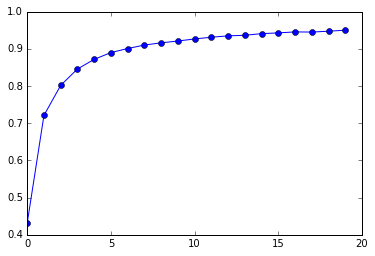

INFO:Saved checkpoint to "Result/<6-02:03:43>CF[E20]/[ACC-0.94998 E19]-0019.params"


In [ ]:
from CNN.cnn import cnn_net

def cf_train( sv=SOLVE, param=PARAMS ):
    net = cnn_net()
    train, val = get_data('c', 2, small=False)

    sv['name'] = 'CF'
    sv['is_rnn'] = False
    param['eval_data'] = val 
    param['num_epoch'] = 20
    
    print 'SOLVE',sv
    print 'param',param
    s = Solver(net, train, sv, **param)
    s.train()
    s.predict()
    
    return s

s = cf_train()